In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.linear_model import Ridge, Lasso
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
import warnings
from sqlalchemy import create_engine
from pyspark.sql import SparkSession
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from sklearn.metrics import mean_squared_error

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [3]:
df_final = pd.read_csv('../data/df_final.csv')

# Split Data Into Training Set and Test Set

Let's split our processed data into training set, validation set, and test set. We'll use the training set to fit our models, validation set to evaluate the model performance. Then, we'll use the test set to make predictions and submit to Kaggle. 

In [4]:
train_processed = df_final.loc[df_final.source == 'train']

test_processed = df_final.loc[df_final.source == 'test']

In [5]:
train_processed.shape

(421570, 257)

In [6]:
test_processed.shape

(115064, 257)

In [7]:
wanted_X_col = \
['size',
 'is_holiday_false',
 'is_holiday_true',
 'previous_weekly_sales',
 'sales_diff',
#     'markdown1',
#     'markdown2',
#     'markdown3',
#     'markdown4',
#     'markdown5',
#     'md1_present',
#     'md2_present',
#     'md3_present',
#     'md4_present',
#     'md5_present',

#  'black_friday_no',
#  'black_friday_yes',
#  'pre_christmas_no',
#  'pre_christmas_yes',
 'temperature',
 'fuel_price',
#  'cpi',
#  'unemployment',
#  'lagged_available',
 'markdown1_filled_na',
 'markdown2_filled_na',
 'markdown3_filled_na',
 'markdown4_filled_na',
 'markdown5_filled_na',
 'cpi_filled',
 'unemployment_filled',
'store_1',
 'store_10',
 'store_11',
 'store_12',
 'store_13',
 'store_14',
 'store_15',
 'store_16',
 'store_17',
 'store_18',
 'store_19',
 'store_2',
 'store_20',
 'store_21',
 'store_22',
 'store_23',
 'store_24',
 'store_25',
 'store_26',
 'store_27',
 'store_28',
 'store_29',
 'store_3',
 'store_30',
 'store_31',
 'store_32',
 'store_33',
 'store_34',
 'store_35',
 'store_36',
 'store_37',
 'store_38',
 'store_39',
 'store_4',
 'store_40',
 'store_41',
 'store_42',
 'store_43',
 'store_44',
 'store_45',
 'store_5',
 'store_6',
 'store_7',
 'store_8',
 'store_9',
 'dept_1',
 'dept_10',
 'dept_11',
 'dept_12',
 'dept_13',
 'dept_14',
 'dept_16',
 'dept_17',
 'dept_18',
 'dept_19',
 'dept_2',
 'dept_20',
 'dept_21',
 'dept_22',
 'dept_23',
 'dept_24',
 'dept_25',
 'dept_26',
 'dept_27',
 'dept_28',
 'dept_29',
 'dept_3',
 'dept_30',
 'dept_31',
 'dept_32',
 'dept_33',
 'dept_34',
 'dept_35',
 'dept_36',
 'dept_37',
 'dept_38',
 'dept_39',
 'dept_4',
 'dept_40',
 'dept_41',
 'dept_42',
 'dept_43',
 'dept_44',
 'dept_45',
 'dept_46',
 'dept_47',
 'dept_48',
 'dept_49',
 'dept_5',
 'dept_50',
 'dept_51',
 'dept_52',
 'dept_54',
 'dept_55',
 'dept_56',
 'dept_58',
 'dept_59',
 'dept_6',
 'dept_60',
 'dept_65',
 'dept_67',
 'dept_7',
 'dept_71',
 'dept_72',
 'dept_74',
 'dept_77',
 'dept_78',
 'dept_79',
 'dept_8',
 'dept_80',
 'dept_81',
 'dept_82',
 'dept_83',
 'dept_85',
 'dept_87',
 'dept_9',
 'dept_90',
 'dept_91',
 'dept_92',
 'dept_93',
 'dept_94',
 'dept_95',
 'dept_96',
 'dept_97',
 'dept_98',
 'dept_99',
 'type_A',
 'type_B',
 'type_C',
 'week_of_year_1',
 'week_of_year_10',
 'week_of_year_11',
 'week_of_year_12',
 'week_of_year_13',
 'week_of_year_14',
 'week_of_year_15',
 'week_of_year_16',
 'week_of_year_17',
 'week_of_year_18',
 'week_of_year_19',
 'week_of_year_2',
 'week_of_year_20',
 'week_of_year_21',
 'week_of_year_22',
 'week_of_year_23',
 'week_of_year_24',
 'week_of_year_25',
 'week_of_year_26',
 'week_of_year_27',
 'week_of_year_28',
 'week_of_year_29',
 'week_of_year_3',
 'week_of_year_30',
 'week_of_year_31',
 'week_of_year_32',
 'week_of_year_33',
 'week_of_year_34',
 'week_of_year_35',
 'week_of_year_36',
 'week_of_year_37',
 'week_of_year_38',
 'week_of_year_39',
 'week_of_year_4',
 'week_of_year_40',
 'week_of_year_41',
 'week_of_year_42',
 'week_of_year_43',
 'week_of_year_44',
 'week_of_year_45',
 'week_of_year_46',
 'week_of_year_47',
 'week_of_year_48',
 'week_of_year_49',
 'week_of_year_5',
 'week_of_year_50',
 'week_of_year_51',
 'week_of_year_52',
 'week_of_year_6',
 'week_of_year_7',
 'week_of_year_8',
 'week_of_year_9',
 'month_1',
 'month_10',
 'month_11',
 'month_12',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9']

In [8]:
# Set seed for reproducability 
np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(train_processed[wanted_X_col], 
                                                  train_processed['value_to_predict'], 
                                                  test_size=0.2, 
                                                  random_state=42)
print(X_val.shape)
print(y_val.shape)

(84314, 207)
(84314,)


In [9]:
X_test = test_processed[wanted_X_col]

In [10]:
X_train.describe()

,size,is_holiday_false,is_holiday_true,previous_weekly_sales,sales_diff,temperature,fuel_price,markdown1_filled_na,markdown2_filled_na,markdown3_filled_na,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
count,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,...,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000
mean,136751.991538,0.929801,0.070199,15983.248229,-250.141924,60.094652,3.360467,7622.131842,2049.192737,1014.515016,...,0.055957,0.070635,0.084280,0.091512,0.097807,0.083595,0.090421,0.097365,0.090299,0.091307
std,61000.715380,0.255482,0.255482,22701.200755,6777.438784,18.453369,0.458803,8246.548266,6725.377601,8202.044286,...,0.229840,0.256214,0.277808,0.288336,0.297054,0.276780,0.286784,0.296455,0.286611,0.288046
min,34875.000000,0.000000,0.000000,-4988.940000,-518455.835000,-2.060000,2.472000,-794.310000,-265.760000,-89.130000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93638.000000,1.000000,0.000000,2081.755000,-595.662500,46.700000,2.932000,2418.700000,6.970000,5.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140167.000000,1.000000,0.000000,7607.195000,0.000000,62.090000,3.452000,5600.810000,128.310000,30.560000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202505.000000,1.000000,0.000000,20216.855000,544.725000,74.290000,3.738000,9650.620000,848.240000,117.270000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,219622.000000,1.000000,1.000000,693099.360000,579251.325000,100.140000,4.468000,88646.760000,104519.540000,144012.525000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Neural Networks Implementation

The following neural network implemention is from [here](https://www.kaggle.com/fernandol/cracking-the-walmart-sales-forecasting-challenge?scriptVersionId=3025467).

Epoch 1/10
337256/337256 [==============================] - 5s 14us/step - loss: 1868.1920 - acc: 1.8087e-04
Epoch 2/10
337256/337256 [==============================] - 4s 13us/step - loss: 1477.2204 - acc: 2.0163e-04
Epoch 3/10
337256/337256 [==============================] - 5s 14us/step - loss: 1464.4093 - acc: 2.1052e-04
Epoch 4/10
337256/337256 [==============================] - 4s 13us/step - loss: 1461.9619 - acc: 4.5366e-04
Epoch 5/10
337256/337256 [==============================] - 5s 14us/step - loss: 1458.6386 - acc: 4.7145e-04
Epoch 6/10
337256/337256 [==============================] - 4s 13us/step - loss: 1456.9661 - acc: 5.1296e-04
Epoch 7/10
337256/337256 [==============================] - 5s 15us/step - loss: 1456.8636 - acc: 4.8035e-04
Epoch 8/10
337256/337256 [==============================] - 5s 13us/step - loss: 1447.5923 - acc: 6.8197e-04
Epoch 9/10
337256/337256 [==============================] - 5s 14us/step - loss: 1443.5225 - acc: 5.6041e-04
Epoch 10/10
84314/8

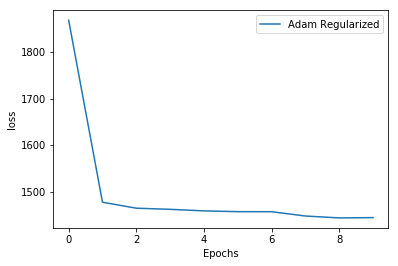

In [11]:
neural = True
if neural:
    # Sequential model
    
    adam_regularized = Sequential()

    # First hidden layer now regularized
    adam_regularized.add(Dense(32,activation='relu',
                    input_dim=X_train.shape[1],
                    kernel_regularizer = regularizers.l2(0.01)))

    # Second hidden layer now regularized
    adam_regularized.add(Dense(16,activation='relu',
                       kernel_regularizer = regularizers.l2(0.01)))

    # Output layer stayed sigmoid
    adam_regularized.add(Dense(1,activation='linear'))

    # Setup adam optimizer
    adam_optimizer=keras.optimizers.Adam(lr=0.01,
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08)

    # Compile the model
    adam_regularized.compile(optimizer=adam_optimizer,
                  loss='mean_absolute_error',
                  metrics=['acc'])

    # Train
    history_adam_regularized=adam_regularized.fit(X_train, y_train, # Train on training set
                                 epochs=10, # We will train over 1,000 epochs
                                 batch_size=2048, # Batch size 
                                 verbose=1) # Suppress Keras output
    adam_regularized.evaluate(x=X_val,y=y_val)

    # Plot network
    plt.plot(history_adam_regularized.history['loss'], label='Adam Regularized')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    y_pred_neural = adam_regularized.predict(X_test)

In [12]:
y_pred_neural = adam_regularized.predict(X_test)

In [13]:
y_pred_neural

array([[-2325.2808  ],
       [  -63.478027],
       [  -62.406006],
       ...,
       [  -53.092285],
       [  -62.356537],
       [  -31.194244]], dtype=float32)

In [14]:
y_pred_neural_df = pd.DataFrame(y_pred_neural)

In [15]:
y_pred_neural_df.columns = ['predicted_difference']

In [16]:
y_pred_neural_df.shape

(115064, 1)

In [17]:
y_pred_neural_df.isnull().sum()

predicted_difference    0
dtype: int64

In [18]:
test_file = pd.concat([test_processed.reset_index(drop=True), y_pred_neural_df], axis=1)

In [19]:
test_file.head()

,type,dept,store,month,is_holiday,week_of_year,date,weekly_sales,temperature,fuel_price,...,median_sales,median_sales_fillna,previous_week,next_week,previous_weekly_sales,sales_diff,weekly_sales_na_filled,value_to_predict,lagged_available,predicted_difference
0,A,1,1,11.0,False,44,2012-11-02,0.0,55.32,3.386,...,19551.115,19551.115,2012-10-26,2012-11-09,27390.810,-7839.695,0.0,19551.115,1,-2325.280762
1,A,1,1,11.0,False,45,2012-11-09,0.0,61.24,3.314,...,19551.115,19551.115,2012-11-02,2012-11-16,19551.115,0.000,0.0,19551.115,1,-63.478027
2,A,1,1,11.0,False,46,2012-11-16,0.0,52.92,3.252,...,19551.115,19551.115,2012-11-09,2012-11-23,19551.115,0.000,0.0,19551.115,1,-62.406006
3,A,1,1,11.0,True,47,2012-11-23,0.0,56.23,3.211,...,19865.770,19865.770,2012-11-16,2012-11-30,19865.770,0.000,0.0,19865.770,1,-0.075256
4,A,1,1,11.0,False,48,2012-11-30,0.0,52.34,3.207,...,19551.115,19551.115,2012-11-23,2012-12-07,19551.115,0.000,0.0,19551.115,1,-131.071106


In [20]:
# test_file['prediction'] = test_file['predicted_difference']
test_file['prediction'] = test_file['median_sales_fillna'] - test_file['predicted_difference']

In [21]:
test_file['prediction'].isnull().sum()

0

In [22]:
test_file.head()

,type,dept,store,month,is_holiday,week_of_year,date,weekly_sales,temperature,fuel_price,...,median_sales_fillna,previous_week,next_week,previous_weekly_sales,sales_diff,weekly_sales_na_filled,value_to_predict,lagged_available,predicted_difference,prediction
0,A,1,1,11.0,False,44,2012-11-02,0.0,55.32,3.386,...,19551.115,2012-10-26,2012-11-09,27390.810,-7839.695,0.0,19551.115,1,-2325.280762,21876.395762
1,A,1,1,11.0,False,45,2012-11-09,0.0,61.24,3.314,...,19551.115,2012-11-02,2012-11-16,19551.115,0.000,0.0,19551.115,1,-63.478027,19614.593027
2,A,1,1,11.0,False,46,2012-11-16,0.0,52.92,3.252,...,19551.115,2012-11-09,2012-11-23,19551.115,0.000,0.0,19551.115,1,-62.406006,19613.521006
3,A,1,1,11.0,True,47,2012-11-23,0.0,56.23,3.211,...,19865.770,2012-11-16,2012-11-30,19865.770,0.000,0.0,19865.770,1,-0.075256,19865.845256
4,A,1,1,11.0,False,48,2012-11-30,0.0,52.34,3.207,...,19551.115,2012-11-23,2012-12-07,19551.115,0.000,0.0,19551.115,1,-131.071106,19682.186106


In [23]:
test_file.shape

(115064, 259)

In [24]:
submission_df = pd.DataFrame({
                    'id': test_file.store.astype(str) + '_' + test_file.dept.astype(str) + '_' + test_file.date.astype(str),
                    'Weekly_Sales': test_file.prediction})

In [25]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 2 columns):
id              115064 non-null object
Weekly_Sales    115064 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [26]:
submission_df.sort_values(by = 'id').head()

,id,Weekly_Sales
24245,10_10_2012-11-02,45121.721208
24246,10_10_2012-11-09,44815.835588
24247,10_10_2012-11-16,44802.886003
24248,10_10_2012-11-23,45381.605256
24249,10_10_2012-11-30,43245.481646


In [27]:
submission_df.isnull().sum()

id              0
Weekly_Sales    0
dtype: int64

In [ ]:
submission_df.to_csv('../data/submission.csv',index=False)